### Doco for figuring out how to use Manim and what I want to use it for.
Some Ideas for use cases are:
- The convolving kernel.
- The UNET architecture.
- The Zipf distribution.
- The evolving dummy city timesteps.

Installation is following [this](https://docs.manim.community/en/stable/installation/linux.html) guide.

In [1]:
from manim import *

Manim Community v0.16.0.post0

When following the community installation instructions, I initially got an error
when importing Manim. This was fixed by running:
`conda install -c conda-forge pycairo`

In [2]:
config.media_width = "80%"
config.verbosity = "WARNING"

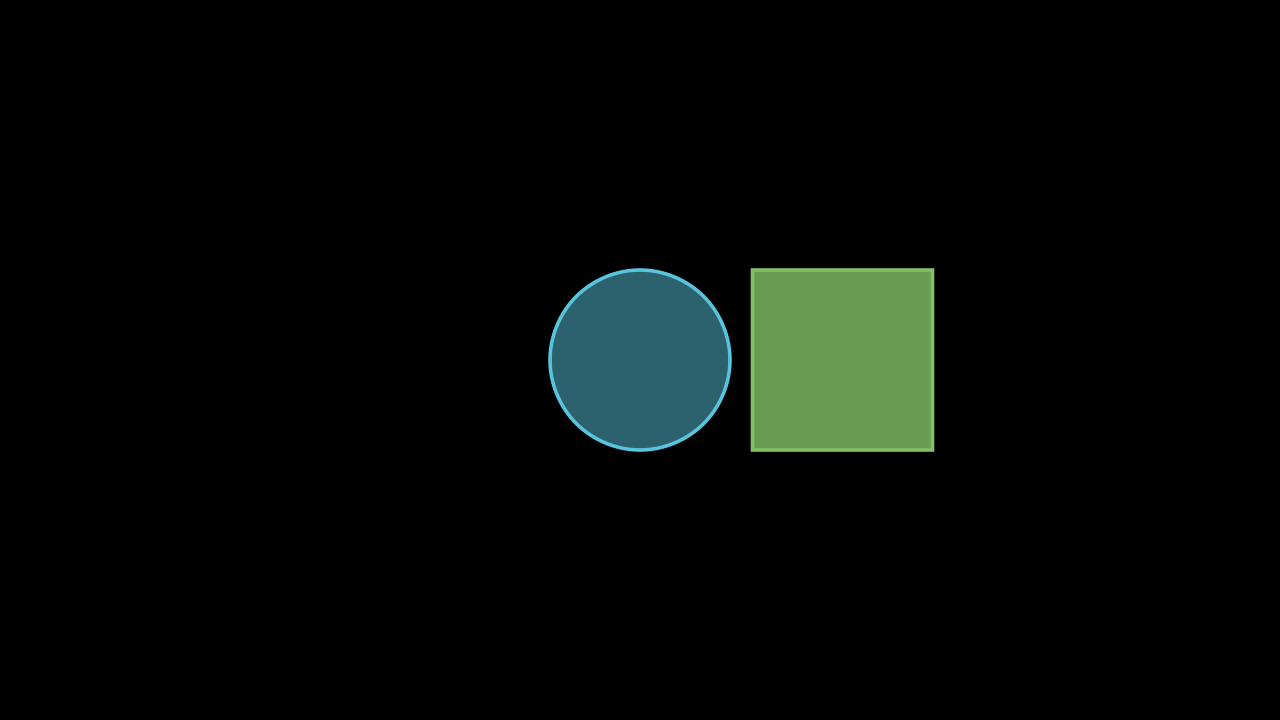

In [3]:
%%manim -qm FirstExample

# Scenes are like the canvas/background that other objects inherit from.
class FirstExample(Scene):
    def construct(self): # Method for adding objects.
        blue_circle = Circle(color=BLUE, fill_opacity=0.5) # Declare objects first.
        green_square = Square(color=GREEN, fill_opacity=0.8)
        green_square.next_to(blue_circle, RIGHT) # By default newly created obj go in middle.
        self.add(blue_circle, green_square) # Then add them to canvas.

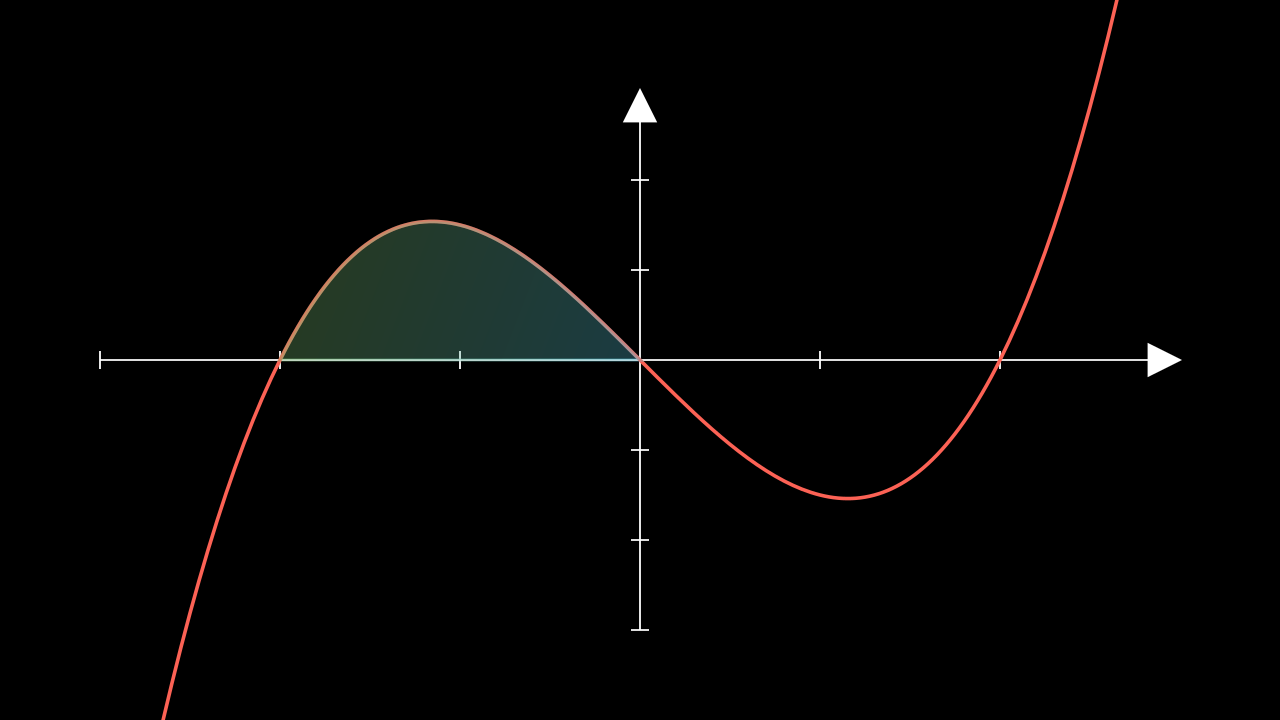

In [4]:
%%manim -qm SecondExample # This is the imagic command to render in notebook.

class SecondExample(Scene):
    def construct(self):
        ax = Axes(x_range=(-3, 3), y_range=(-3, 3)) # Note, upper bounds of axes get arrows.
        curve = ax.plot(lambda x: (x+2)*x*(x-2)/2, color=RED) # syntactically similar to mpl
        area = ax.get_area(curve, (-2, 0))
        self.add(ax, curve, area)

In [5]:
%%manim -qm SecondExample

class SecondExample(Scene):
    def construct(self):
        ax = Axes(x_range=(-3, 3), y_range=(-3, 3))
        curve = ax.plot(lambda x: (x+2)*x*(x-2)/2, color=RED)
        area = ax.get_area(curve, x_range=(-2, 0))
        self.play(Create(ax, run_time=2), Create(curve, run_time=5)) # Animation call x2
        self.play(FadeIn(area)) # Animation call
        self.wait(2) # How long it waits before it starts next loop of vid.

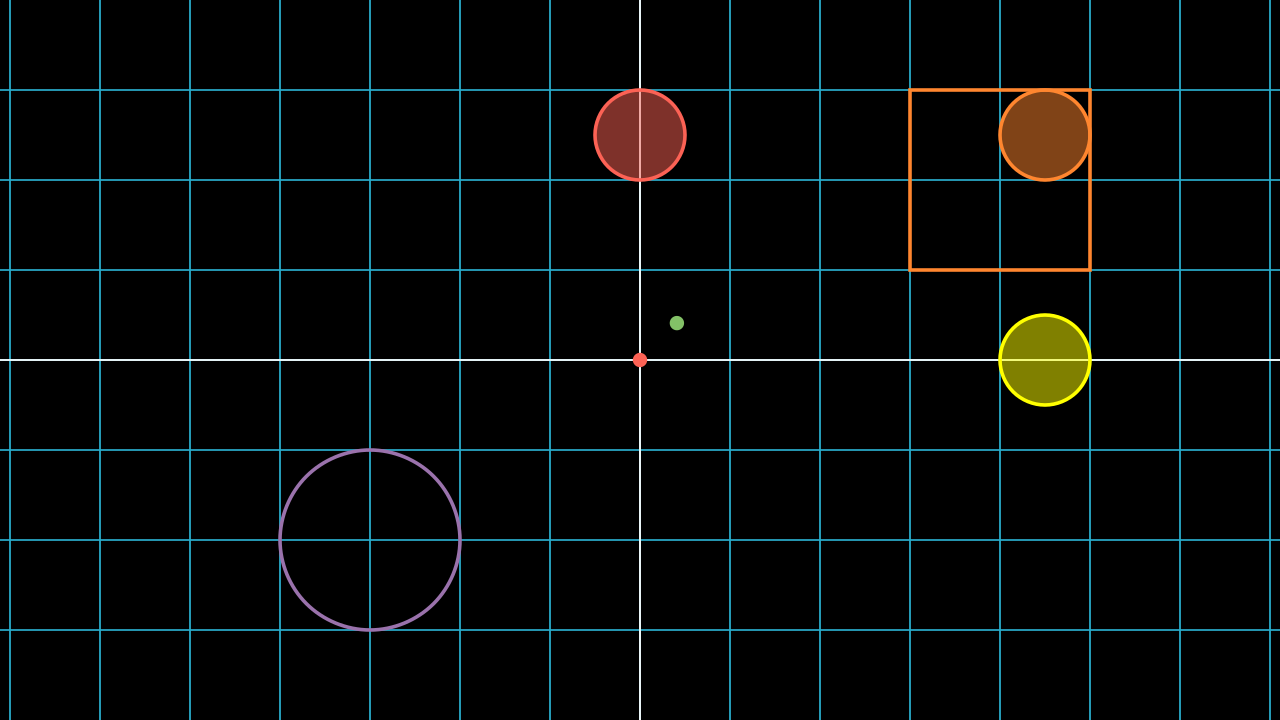

In [6]:
%%manim -qm Positioning

class Positioning(Scene):
    def construct(self):
        plane = NumberPlane() # defines grid
        self.add(plane) # adds grid

        # next_to from episode 1
        red_dot = Dot(color=RED)
        green_dot = Dot(color=GREEN)
        green_dot.next_to(red_dot, RIGHT + UP)  # RIGHT == [1, 0, 0]
        self.add(red_dot, green_dot)

        # shift
        s = Square(color=ORANGE)
        s.shift(2*UP + 4*RIGHT)
        self.add(s)

        # move_to
        c = Circle(color=PURPLE)
        c.move_to([-3, -2, 0])
        self.add(c)

        # align_to
        c2 = Circle(radius=0.5, color=RED, fill_opacity=0.5)
        c3 = c2.copy().set_color(YELLOW)
        c4 = c2.copy().set_color(ORANGE)
        c2.align_to(s, UP)
        c3.align_to(s, RIGHT)
        c4.align_to(s, UP + RIGHT)
        self.add(c2, c3, c4)

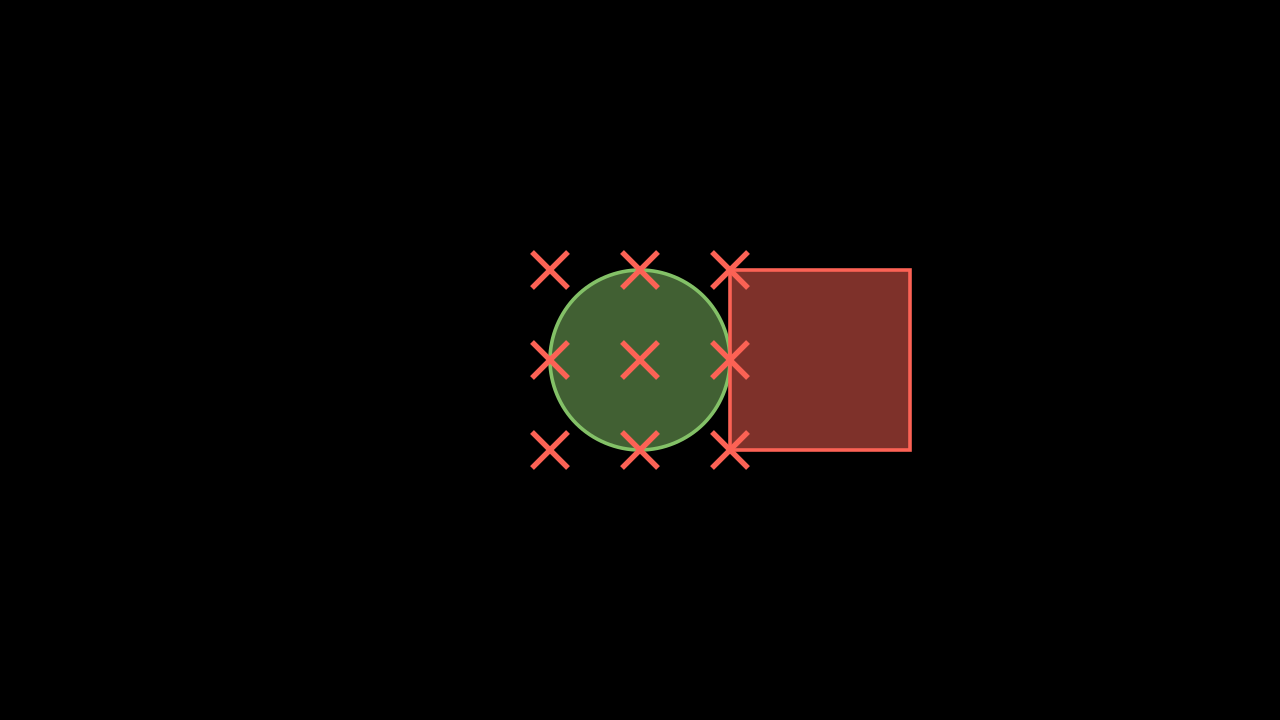

In [7]:
%%manim -qm CriticalPoints

class CriticalPoints(Scene):
    def construct(self):
        c = Circle(color=GREEN, fill_opacity=0.5)
        self.add(c)

        for d in [(0,0,0), UP, UR, RIGHT, DR, DOWN, DL, LEFT, UL]:
            self.add(Cross(scale_factor=0.2).move_to(c.get_critical_point(d)))

        s = Square(color=RED, fill_opacity=0.5)
        s.move_to([1,0,0], aligned_edge=LEFT)
        self.add(s)
        

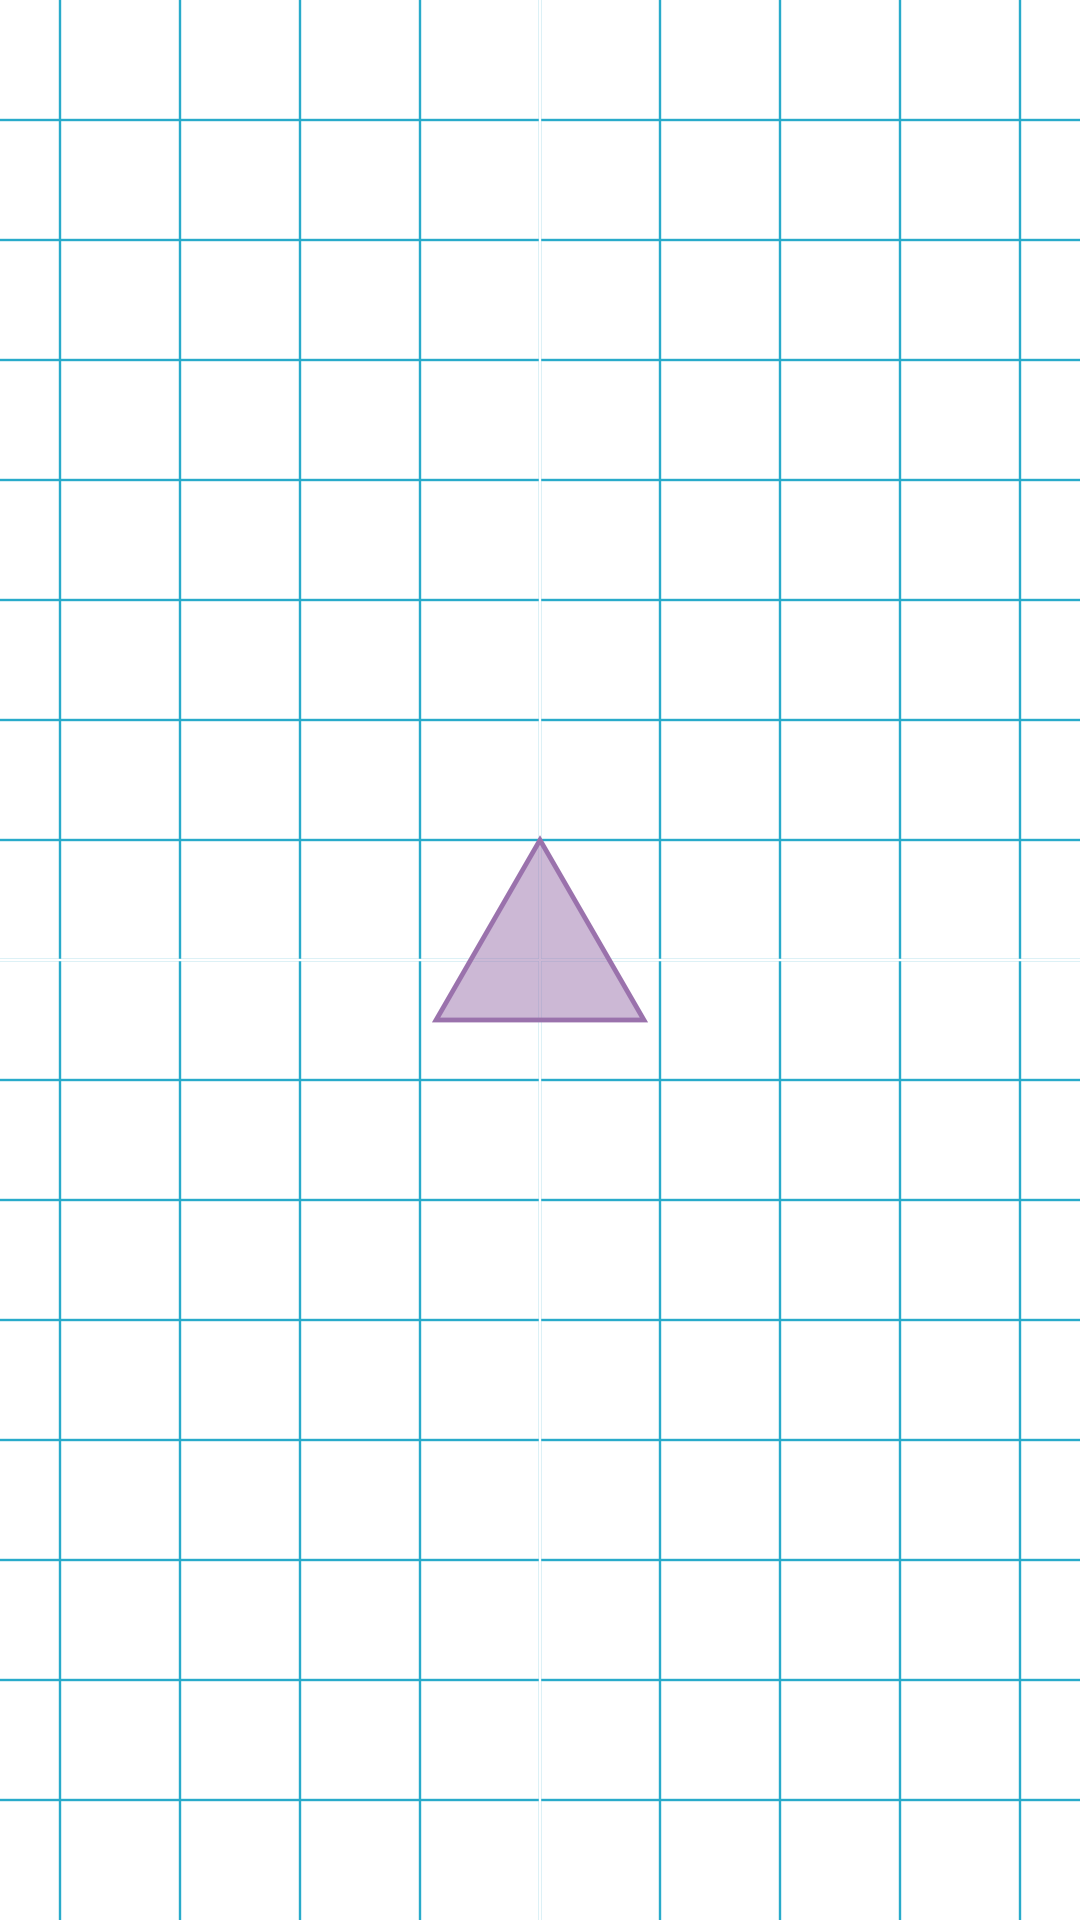

In [10]:
%%manim SimpleScene

config.background_color = WHITE
config.frame_width = 9
config.frame_height = 16

config.pixel_width = 1080
config.pixel_height = 1920

class SimpleScene(Scene):
    def construct(self):
        plane = NumberPlane(x_range=(-4.5, 4.5), y_range=(-8, 8))
        t = Triangle(color=PURPLE, fill_opacity=0.5)
        self.add(plane, t)

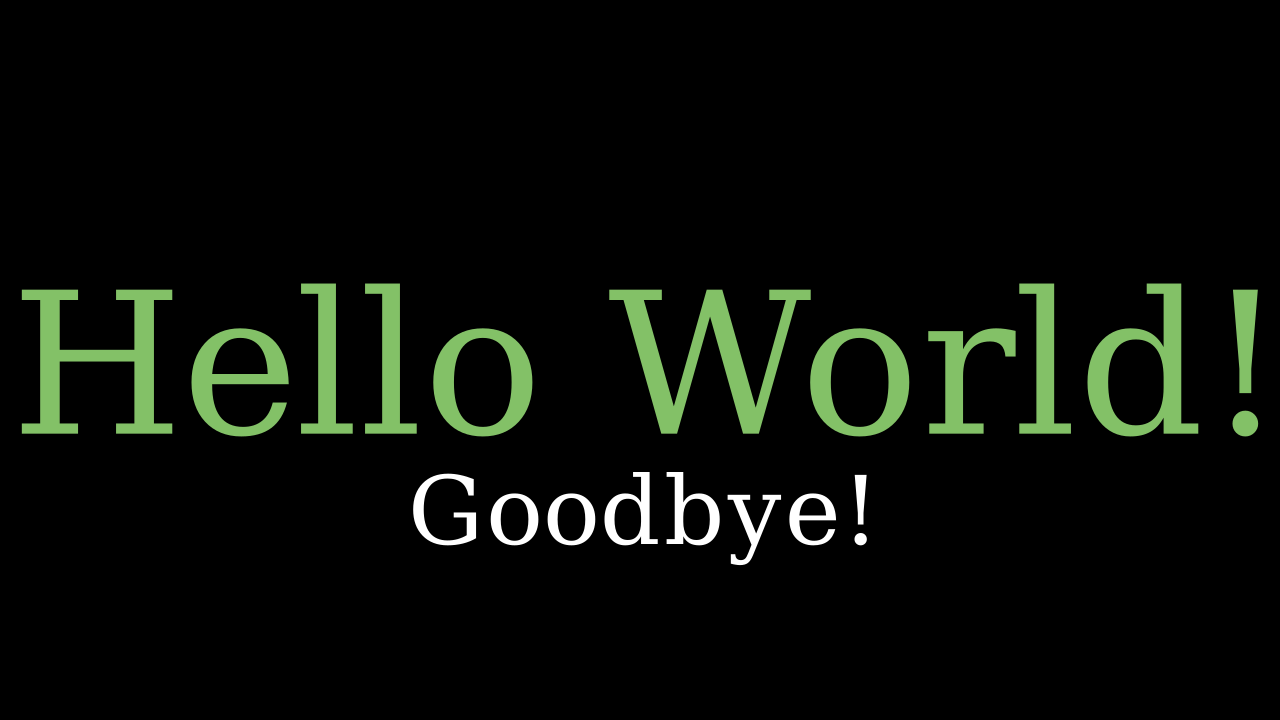

In [11]:
%%manim -qm ChangedDefaults

config.background_color = BLACK

class ChangedDefaults(Scene):
    def construct(self):
        Text.set_default(color=GREEN, font_size=100)
        t = Text("Hello World!")

        Text.set_default()  # reset previously changed default values
        t2 = Text("Goodbye!").next_to(t, DOWN)
        self.add(t, t2)

In [23]:
%%manim -qm TestMyIdea

config.background_color = BLACK

class TestMyIdea(Scene):
    def construct(self):
        Text.set_default(color=GREEN, font_size=30)
        first = Text("Growing cities:\n a machine learning approach")

        Text.set_default(color=BLUE, font_size=20)
        second = Text("Johnny Lowis, PHYS391").next_to(first, DOWN)

        self.play(FadeIn(first, run_time=2), FadeIn(second, run_time=5))
        self.wait(2)
        

### Now let us try animating the Zipf distribution that we will be using

In [24]:
def zipf(r, N=100, s=1):
    """ Here I am trying to functionalise the above distribution, where r = k = distance from centre.
        Further changes can be made as well, but for now I just fixed the values of N and s."""
    iterator = np.array([1/n for n in range(1, N)]).sum()
    return np.array((1/(r**s)))/iterator

In [39]:
%%manim -qm Zipf

config.background_color = BLACK
config.frame_width = 10
config.frame_height = 10

class Zipf(Scene):
    def construct(self):
        ax = Axes(x_range=(-3, 3), y_range=(-3, 3), x_axis_config={
                "numbers_to_include": np.arange(0.1, 10.1, 1),
                "numbers_with_elongated_ticks": np.arange(-10, 10.01, 2),
            },)
        curve = ax.plot(lambda x: zipf(x), color=RED)
        # area = ax.get_area(curve, x_range=(-2, 0))
        self.play(Create(ax, run_time=2), Create(curve, run_time=5)) # Animation call x2
        # self.play(FadeIn(area)) # Animation call
        self.wait(2) # How long it waits before it starts next loop of vid.

sh: 1: latex: not found


RuntimeError: latex failed but did not produce a log file. Check your LaTeX installation.

In [40]:
%%manim -qm ArgMinExample

class ArgMinExample(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 10], y_range=[0, 100, 10], axis_config={"include_tip": False}
        )
        labels = ax.get_axis_labels(x_label="x", y_label="f(x)")

        t = ValueTracker(0)

        def func(x):
            return 2 * (x - 5) ** 2
        graph = ax.plot(func, color=MAROON)

        initial_point = [ax.coords_to_point(t.get_value(), func(t.get_value()))]
        dot = Dot(point=initial_point)

        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), func(t.get_value()))))
        x_space = np.linspace(*ax.x_range[:2],200)
        minimum_index = func(x_space).argmin()

        self.add(ax, labels, graph, dot)
        self.play(t.animate.set_value(x_space[minimum_index]))
        self.wait()

sh: 1: latex: not found


RuntimeError: latex failed but did not produce a log file. Check your LaTeX installation.